# Sentiment Analysis on Zomato Restaurants Review 

In [3]:
import pandas as pd 
df=pd.read_csv('reviews.csv')
print(df.head())

        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0  


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [5]:
df.count()

Restaurant    10000
Reviewer       9962
Review         9955
Rating         9962
Metadata       9962
Time           9962
Pictures      10000
dtype: int64

In [6]:
df.isnull().count()

Restaurant    10000
Reviewer      10000
Review        10000
Rating        10000
Metadata      10000
Time          10000
Pictures      10000
dtype: int64

In [7]:
df.Restaurant.nunique(dropna=True)

100

In [9]:
df.Reviewer.nunique(dropna=True)

7446

In [10]:
df['Rating'].isna().sum()

38

In [11]:
df['Rating']=df['Rating'].fillna(0)

In [12]:
df['Rating'].isna().sum()

0

In [13]:
df.shape

(10000, 7)

In [18]:
i=df[(df.Rating=='Like')].index
print(i)

Int64Index([7601], dtype='int64')


In [21]:
df=df.drop(7601)

In [22]:
df.shape

(9999, 7)

In [25]:
rating=df.Rating.tolist()
print(len(rating))

9999


In [29]:
for i in range(0,len(rating)):
    rating[i]=float(rating[i])
import numpy as np
print(np.unique(rating))

[0.  1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


In [30]:
df['rating']=rating

In [31]:
df.shape

(9999, 8)

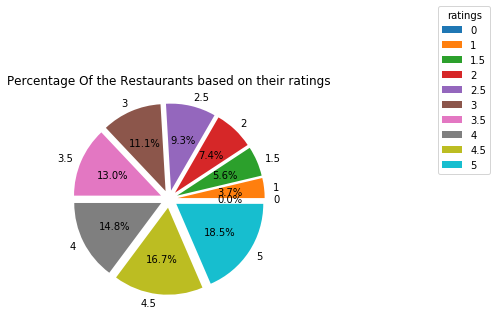

In [34]:
import matplotlib.pyplot as plt
y=np.unique(rating)
mylabel=[0,1,1.5,2,2.5,3,3.5,4,4.5,5]
plt.pie(y,labels=mylabel,autopct='%1.1f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.legend(title='ratings',bbox_to_anchor=(2,1),loc='right')
plt.title('Percentage Of the Restaurants based on their ratings')
plt.show()



In [35]:
df['Review'].count()

9954

In [37]:
pd.cut(df['rating'],bins=3).value_counts(sort=False)

(-0.005, 1.667]    1782
(1.667, 3.333]     1896
(3.333, 5.0]       6321
Name: rating, dtype: int64

In [49]:
labels=['below average','Average','Great']
df['rating_group']=pd.cut(df['rating'],bins=3,labels=labels)
print(df.head(3))

        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   

                  Metadata             Time  Pictures  rating rating_group  
0   1 Review , 2 Followers  5/25/2019 15:54         0     5.0        Great  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0     5.0        Great  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0     5.0        Great  


In [40]:
df1=df.drop(['Rating','rating'],axis=1)

In [41]:
df1.drop(['Restaurant','Reviewer','Metadata','Time','Pictures'],axis=1,inplace=True)

In [50]:
df1.dropna()

,Review,rating_group
0,"the ambience was good, food was quite good . h...",Great
1,ambience is too good for a pleasant evening. s...,Great
2,a must try.. great food great ambience. thnx f...,Great
3,soumen das and arun was a great guy. only beca...,Great
4,food is good.we ordered kodi drumsticks and ba...,Great
...,...,...
9995,madhumathi mahajan well to start with nice cou...,Average
9996,this place has never disappointed us.. the foo...,Great
9997,"bad rating is mainly because of ""chicken bone ...",below average
9998,i personally love and prefer chinese food. had...,Great


In [51]:
df1['Review']=df1['Review'].str.lower()

In [52]:
print(df.head(3))

        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   

                  Metadata             Time  Pictures  rating rating_group  
0   1 Review , 2 Followers  5/25/2019 15:54         0     5.0        Great  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0     5.0        Great  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0     5.0        Great  


In [54]:
df2=df1.dropna()
df2.shape

(9954, 2)

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Review        9954 non-null   object  
 1   rating_group  9954 non-null   category
dtypes: category(1), object(1)
memory usage: 165.4+ KB


In [56]:
df2['Review']=df2.fillna({'Review':""})

C:\Users\BANDARU\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
import re
import string
def text_clean(text):
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    text=re.sub('[''""...]','',text)
    text=re.sub('\n','',text)
    return text
cleaned=lambda x:text_clean(x)

In [69]:
df2['Review']=pd.DataFrame(df2['Review'].apply(cleaned))
df2.head()

C:\Users\BANDARU\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Review,rating_group
0,the ambience was good food was quite good had...,Great
1,ambience is too good for a pleasant evening se...,Great
2,a must try great food great ambience thnx for ...,Great
3,soumen das and arun was a great guy only becau...,Great
4,food is goodwe ordered kodi drumsticks and bas...,Great


In [80]:
from sklearn.model_selection import train_test_split
X=df2['Review']
Y=df2['rating_group']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)
print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("Y_train:",len(Y_train))
print("Y_test:",len(Y_test))

X_train: 7465
X_test: 2489
Y_train: 7465
Y_test: 2489


In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tvec=TfidfVectorizer()
clf2=LogisticRegression(solver='lbfgs',max_iter=1000)

In [113]:
from sklearn.pipeline import Pipeline
model=Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inter

In [122]:
from sklearn.metrics import confusion_matrix
predictions=model.predict(X_test)
confusion_matrix(prediction,Y_test)

array([[ 221,   40,   76],
       [ 212, 1494,   53],
       [  79,   12,  302]], dtype=int64)

In [124]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print('accuracy:',accuracy_score(predictions,Y_test))
print('precision:',precision_score(predictions,Y_test,average='weighted'))
print('precision:',recall_score(predictions,Y_test,average='weighted'))



accuracy: 0.810365608678184
precision: 0.8520177362612571
precision: 0.810365608678184


In [135]:
#Example Review To check Sentiment Anaylsis

example=["worst"]
result=model.predict(example)
print(result)

['below average']


In [136]:
example2=["delicious food"]
result=model.predict(example2)
print(result)

['Great']
